<font size=5  color=#003366> <b>[LELEC2900] - Signal Processing <br><br> 
Python06 - Wavelets Theory</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. L. Vandendorpe<br>
Prof. L. Jacques
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Florian Quatresooz (florian.quatresooz@uclouvain.be) <br>
<br><br>
</font>

<font size=5 color=#009999> <b> Spatial Resolution of the Fourier Transform </b> </font> <br> 

We can use the Fourier Transform to  transform a signal from its time-domain to its frequency domain. The peaks in the frequency spectrum indicate the most occurring frequencies in the signal. The larger and sharper a peak is, the more prevalent a frequency is in a signal.

The thing about the Fourier Transform is that it has a high resolution in the frequency-domain but zero resolution in the time-domain. This means that it can tell us exactly which frequencies are present in a signal, but not at which location in time these frequencies have occurred. This can easily be demonstrated as follows:

<img src="Imgs/Limits_of_FT.png" width = "700">

In the above Figure, we can see at the top left a signal containing four different frequencies (4, 30, 60 and 90 Hz) which are present at all times and on the right its frequency spectrum. In the bottom figure, we can see the same four frequencies, only the first one is present in the first quarter of the signal, the second one in the second quarter, etc. In addition, on the right side we again see its frequency spectrum.

What is important to note here is that the two frequency spectra contain exactly the same four peaks, so it can not tell us where in the signal these frequencies are present. The Fourier Transform can not distinguish between the first two signals.

PS: The side lobes we see in the bottom frequency spectrum, is due to the discontinuity between the four different frequencies.<br><br>


<font size=5 color=#009999> <b> The Wavelet Transform </b> </font> <br> 

The Fourier Transform uses a series of sine-waves with different frequencies to analyze a signal. That is, a signal is represented through a linear combination of sine-waves.
The Wavelet Transform uses a series of functions called wavelets, each with a different scale.The main difference is that the sine-wave is not localized in time while a wavelet is localized in time. This allows the wavelet transform to obtain time-information in addition to frequency information.

<img src="Imgs/wavelet.png" width = "400">

Another difference between the Fourier Transform and the Wavelet Transform is that there are many different families (types) of wavelets. The wavelet families differ from each other since for each family a different trade-off has been made in how compact and smooth the wavelet looks like. This means that we can choose a specific wavelet family which fits best with the features we are looking for in our signal.

The PyWavelets library for example contains 14 mother Wavelets (families of Wavelets):

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


C:\Users\Thomas\Desktop\UCL\2900\Python3\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


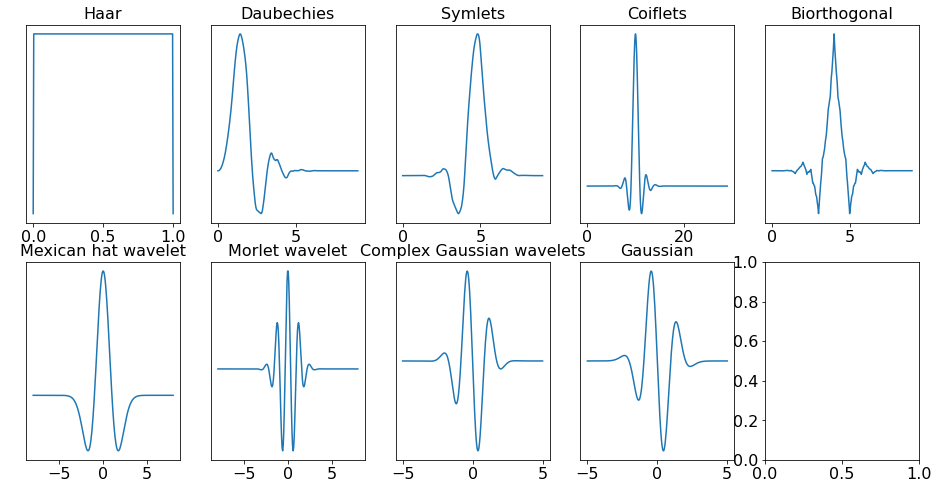

In [38]:
import matplotlib.pyplot as plt
import pywt
print(pywt.families(short=False))
plt.rcParams['figure.figsize'] = [10, 10]

discrete_wavelets  = ['haar','db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs         = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func   = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet      = func(waveletname)
        family_name  = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal   = wavelet.orthogonal
        symmetry     = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel(" ", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel(" ", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

Each type of wavelets has a different shape, smoothness and compactness and is useful for a different purpose. During all this practical session, we encourage you to vary thavelet family that your are using. <br><br>


<font size=5 color=#009999> <b>Part I - Develop your intuition<b>  </font> <br> 

In this session, we will only use the Discrete Wavelet Transform, for which there exists a fast algorithm (the fast wavelet transform for 1-D signals of size $N$ is $\mathcal O(N)$!).
According to the [API reference](https://pywavelets.readthedocs.io/en/latest/ref/index.html), the functions we are interested in are:
-  <samp>pywt.dwt </samp> (resp.  <samp>pywt.idwt</samp>) for a *single-level* transform (resp. single-level inverse transform), and
-  <samp>pywt.wavedec </samp> (resp. <samp>pywt.waverec</samp>) to perform a *multi-level* decomposition (resp. multi-level reconstruction).

<br>


<font size=5 color=#009999> <i>Exercise 1 - Obtain the coefficients</i>  </font> <br> 

In this first exercice, you are asked to complete the <samp>get_decomposition</samp> function which allows to get the n level coefficients of the DWT. The return value must be a list of the form $[cA_n, cD_n, cD_{n-1}, …, cD_2, cD_1]$, where fhe first element ($cA_n$) is the approximation coefficients array and the following elements ($cD_n - cD_1$) are the details coefficients arrays.

<br>

<font size=5 color=#009999> <i>Exercise 2 - DWT of "toy example" signals</i>  </font> <br> 

Generate a time plot for all 4 signals provided in the following cell. Now, without computing the results, try to guess what will be the discrete wavelet decomposition of these signals into approximation and detailed coefficients. 
The, compare your result thanks to the <samp>print_decomposition</samp> function. Vary the level and the wavelet family and comment their impact on the decomposition. 

<br>

<font size=5 color=#009999> <i>Exercise 3 - Distribution of temporal vs. wavelet coefficients </i>  </font> <br> 

In this exercice, we will have a closer look at the values needed to represent the signal in both the temporal (natural) domain and the wavelet domain. For each toy signal presented before, generate :
-  the histogram and the cumulative histogram of the temporal coefficients (these are simply the amplitude values of the signal)
-  the histogram and the cumulative histogram of the wavelet coefficients. (Note: you will have to flatten the coefficients returned by the <samp>get_decomposition</samp> function)

Compare and comment them. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

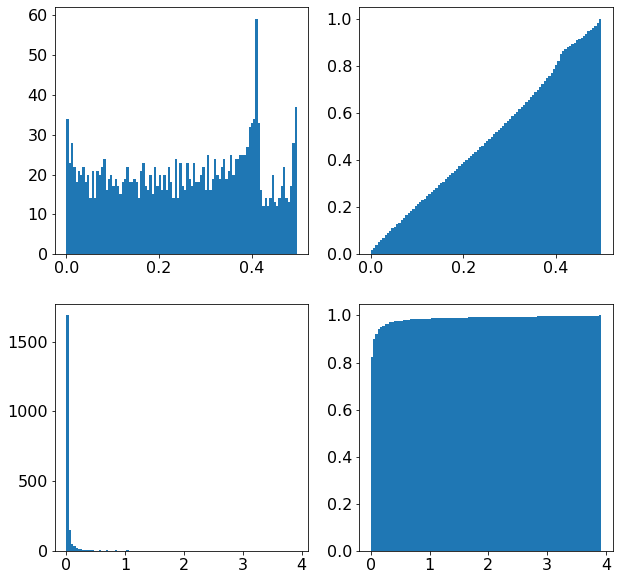

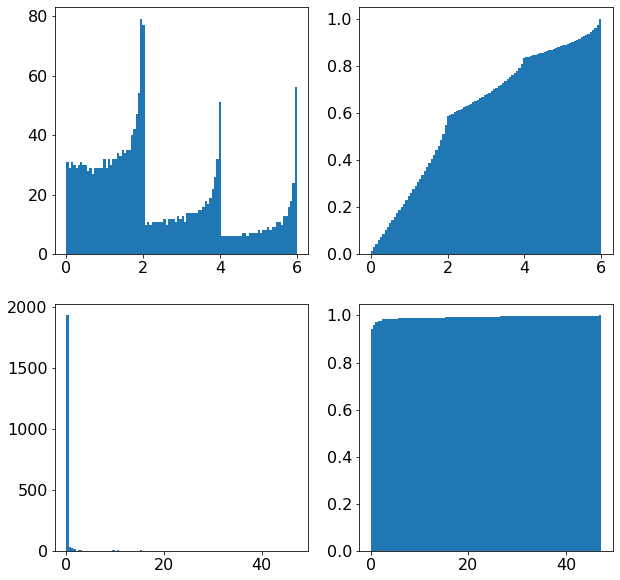

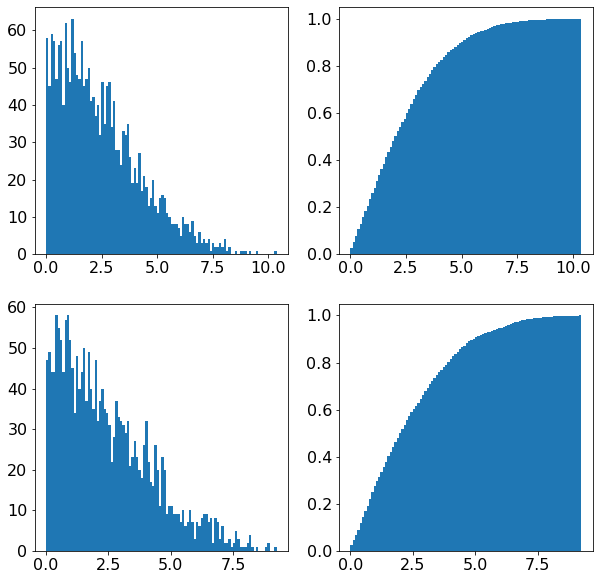

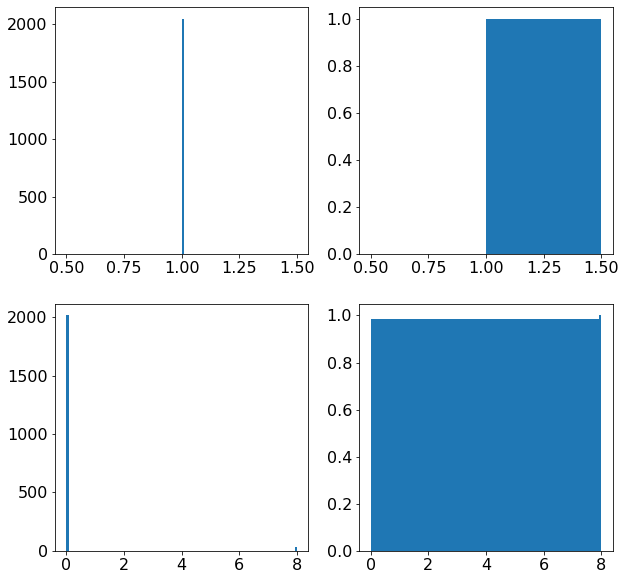

In [135]:
import numpy as np 
import matplotlib.pyplot as plt
import pywt

%load_ext autoreload
%autoreload 2
from make_graphs import print_decomposition

def get_decomposition(signal, show_graph=True, wavelet_type = 'haar', level=6):     
    """This functions applies a (default=6) level DWT on the signal array for a given wavelet 
    (default=haar) basis function.
    the returned values are the coefficients in the following order : [cA_n, cD_n, cD_n-1, …, cD_2, cD_1]
    """
    coeffs = pywt.wavedec(signal,wavelet_type,level=level)
    if show_graph : 
        print_decomposition(signal, coeffs)
    return coeffs
        

x = np.linspace(0, 1, 2048)
all_signals = {}

n_bins = 100

# Signal 1
epsilon = 0.05
all_signals['sig1'] = np.sqrt(x*(1-x))*np.sin(2*np.pi*(1+epsilon)/(x+epsilon))
# Signal 2
all_signals['sig2'] = 4*np.sin(4*np.pi*x) - np.sign(x/0.7) - np.sign(0.72-x)
# Signal 3 
all_signals['sig3'] = np.random.normal(0, 3, 2048)
# Signal 4
all_signals['sig4'] = np.ones(2048)


#get_decomposition(all_signals['sig1'],wavelet_type="sym5",level=7)

# ==============================================
# SIGNAL 1
# ==============================================

plt.subplot(2,2,1)
plt.hist(abs(all_signals['sig1']),bins=n_bins)


plt.subplot(2,2,2)
plt.hist(abs(all_signals['sig1']), density=True, cumulative=True,
        label='Reversed emp.', bins=n_bins)


coef = get_decomposition(all_signals['sig1'],show_graph=False)
f_coef = [abs(item) for sublist in coef for item in sublist]

plt.subplot(2,2,3)
plt.hist(f_coef,bins=n_bins)

plt.subplot(2,2,4)
plt.hist(f_coef, density=True, cumulative=True,
        label='Reversed emp.',bins=n_bins)

# ==============================================
# SIGNAL 2
# ==============================================
plt.figure()
plt.title("Signal 2")

plt.subplot(2,2,1)
plt.hist(abs(all_signals['sig2']),bins=n_bins)


plt.subplot(2,2,2)
plt.hist(abs(all_signals['sig2']), density=True, cumulative=True,
        label='Reversed emp.',bins=n_bins)


coef = get_decomposition(all_signals['sig2'],show_graph=False)
f_coef = [abs(item) for sublist in coef for item in sublist]

plt.subplot(2,2,3)
plt.hist(f_coef,bins=n_bins)

plt.subplot(2,2,4)
plt.hist(f_coef, density=True, cumulative=True,
        label='Reversed emp.',bins=n_bins)
plt.plot()

# ==============================================
# SIGNAL 3
# ==============================================
plt.figure()
plt.title("Signal 3")

plt.subplot(2,2,1)
plt.hist(abs(all_signals['sig3']),bins=n_bins)


plt.subplot(2,2,2)
plt.hist(abs(all_signals['sig3']), density=True, cumulative=True,
        label='Reversed emp.',bins=n_bins)


coef = get_decomposition(all_signals['sig3'],show_graph=False)
f_coef = [abs(item) for sublist in coef for item in sublist]

plt.subplot(2,2,3)
plt.hist(f_coef,bins=n_bins)

plt.subplot(2,2,4)
plt.hist(f_coef, density=True, cumulative=True,
        label='Reversed emp.',bins=n_bins)
plt.plot()

# ==============================================
# SIGNAL 4
# ==============================================
plt.figure()
plt.title("Signal 4")

plt.subplot(2,2,1)
plt.hist(abs(all_signals['sig4']),bins=n_bins)


plt.subplot(2,2,2)
plt.hist(abs(all_signals['sig4']), density=True, cumulative=True,
        label='Reversed emp.',bins=n_bins)


coef = get_decomposition(all_signals['sig4'],show_graph=False)
f_coef = [abs(item) for sublist in coef for item in sublist]

plt.subplot(2,2,3)
plt.hist(f_coef,bins=n_bins)

plt.subplot(2,2,4)
plt.hist(f_coef, density=True, cumulative=True,
        label='Reversed emp.',bins=n_bins)
plt.plot()

<font size=5 color=#009999> <b>Part II - Signal compression <b>  </font> <br> 
    

As you noticed with the previous exercice, natural signals often have some degree of smoothness, which makes them sparse in the wavelet domain. There are far fewer significant components in the wavelet domain in this example than there are in the time domain, and most of the significant components are towards the coarser coefficients on the left. Hence, natural signals are compressible in the wavelet domain.

<br>


<font size=5 color=#009999> <i>Exercise 4 - Compress an ECG signal </i>  </font> <br> 


We say that a signal is *sparse* (resp. *compressible*)—in some basis—if it is *exactly* (resp. *approximately*) described by a very small number of coefficients—in that particular basis. Let's check this for our ECG signal! 

Follow this procedure : 
<ol>
    <li> Get the DWT of the ECG signal provided on moodle. (Note that we only select a part of this signal and artificially decrease the sampling frequency in order to reduce the time complexity of the execice). 
    <li> Fix a paramter $K$ (for example 50) fixing the number of largest coefficients you will keep. 
    <li> Find the $K$'st cofficient with the largest value.
    <li> Put to 0 all coefficients that are smaller to this value.
    <li> Apply the inverse DWT on the modified wavelet coefficients and observe the signal that is reconstructed. Does is resprents well the original signal ? 
    <li> Play around with $K$, the number of nonzero coefficients kept. How many coefficients do you need to have a "good enough" approximation?
</ol>

<br>

<font size=5 color=#009999> <i>Exercise 5 - Evaluate quantitatively the compression method </i>  </font> <br> 

This question of finding a "good enough" approximation is however a little bit vague (one might say, "unscientific"). We would like to qualify the reconstruction, so let's find a rigorous way to measure the error commited. One of the most popular ways to do this is to compute the Signal-to-Noise ratio (SNR). For a true signal $x$ and its approximation $\hat{x}$, the SNR in decibels is given by:

$$
\mathit{SNR} = 10\cdot \log_{10}\left(\frac{\sum_{i}x^2_{i}}{\sum_{i}e^2_{i}}\right),
$$

where $e = x - \hat{x}$ is the approximation error.

Implement a function computing the SNR of a given signal. Use it to evaluate the quality of different wavelet approximations to the ECG singal. 

C:\Users\Thomas\Desktop\UCL\2900\Python3\venv\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[]

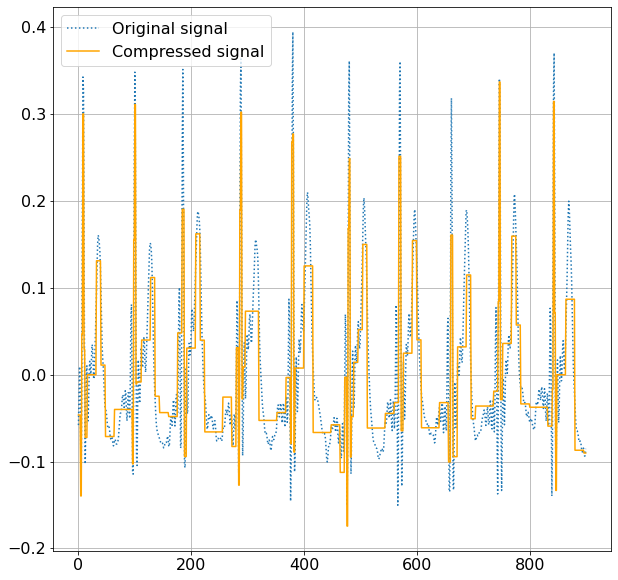

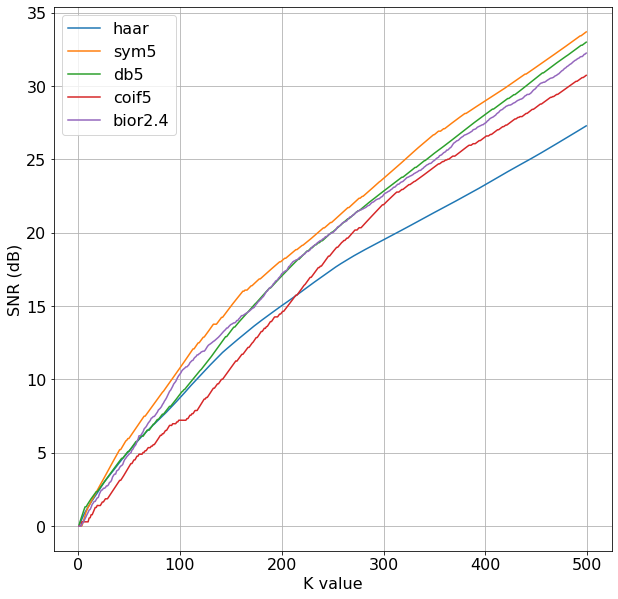

In [176]:
import os
root = os.getcwd()
import pandas as pd
import copy

signal = np.squeeze(pd.read_csv(os.path.join(root,'Data/ECG_Normal.csv')).to_numpy())

# Modification of the input signal
signal = signal[500:5000]
signal = signal[::5]
fs     = 500/5

def SNR(x,x_t):
    x = np.array(x)
    x_t = np.array(x_t)
    sum_e = np.sum(np.square(x-x_t))
    sum_x = np.sum(np.square(x))
    
    return 10*np.log10(sum_x/sum_e)



wavelet= "haar"

coeffs = get_decomposition(signal,show_graph=False,wavelet_type = wavelet)
f_coef = np.array([abs(item) for sublist in coeffs for item in sublist])


modified_coef = list(coeffs)

# Largest coef count
K = 64

min_val = -np.sort(-f_coef)[K-1]

for coeff_list in modified_coef:
    for i,coef in enumerate(coeff_list):
        if coef < min_val and coef > -min_val:
            coeff_list[i] = 0

#print_decomposition(signal,coeffs)
            
reconstructed_signal = pywt.waverec(modified_coef,wavelet)

plt.plot(signal, label="Original signal",linestyle=":")
plt.plot(reconstructed_signal,color="orange",label="Compressed signal")
plt.grid()
plt.legend()
plt.plot()
SNR_LIST = []
K_LIST = range(1,100)

plt.figure()

#============================================

wl = ["haar","sym5","db5","coif5","bior2.4"]
for wavelet in wl:

    coeffs = get_decomposition(signal,show_graph=False,wavelet_type = wavelet)
    f_coef = np.array([abs(item) for sublist in coeffs for item in sublist])

    SNR_LIST = []
    K_LIST = range(1,500)

    for K in K_LIST:
        modified_coef = copy.deepcopy(coeffs)
        f_coef = np.array([abs(item) for sublist in modified_coef for item in sublist])
        min_val = -np.sort(-f_coef)[K-1]

        for coeff_list in modified_coef:
            for i,coef in enumerate(coeff_list):
                if coef < min_val and coef > -min_val:
                    coeff_list[i] = 0
        reconstructed_signal = pywt.waverec(modified_coef,wavelet)
        SNR_LIST.append(SNR(signal,reconstructed_signal))
    plt.plot(K_LIST,SNR_LIST,label=wavelet)

plt.xlabel("K value")
plt.ylabel("SNR (dB)")

plt.grid()
plt.legend()
plt.plot()

